<a href="https://colab.research.google.com/github/KenzaxTazi/Agri-Risk/blob/master/Final_plots_Raghul.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import xarray as xr
import numpy as np

import os, sys

path = '/content/drive/My Drive/Team Plants/data'
os.chdir(path)


#Plots#

In [0]:
#plot a graph
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import string
import pandas as pd

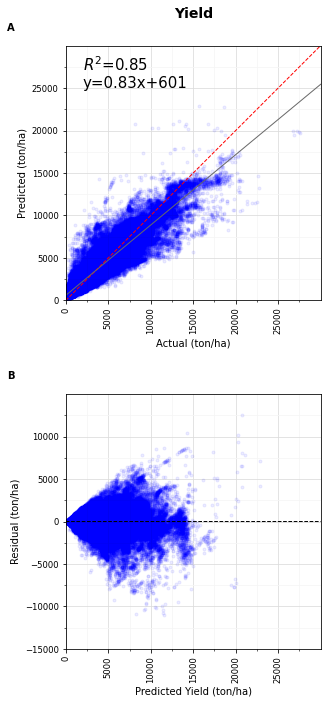

In [23]:
plt.style.use('seaborn-pastel')

fig, ax = plt.subplots(2,1, figsize=(10,10), gridspec_kw={'width_ratios': [1]})

#########################

test_set_0 = pd.read_csv('test_data_predictions_0')

test_set_y = test_set_0[['maize_a_2010']]
test_x_predict = test_set_0[['prediction']]
test_x_predict
r2 = round(r2_score(test_set_y['maize_a_2010'], test_x_predict['prediction']), 2)

max_x = test_set_y['maize_a_2010'].max()
max_y = max(test_x_predict['prediction'])

max_axis = max(max_x, max_y) + 1000 #adds a bit to the max axis so that we can see the max point easily

min_x = test_set_y['maize_a_2010'].min()
min_y = min(test_x_predict['prediction'])

min_axis = min(min_x, min_y) -1000
#equation of line for prediction vs real values

major_ticks = np.arange(0, 30000, 5000)
#major_ticks_labels = np.arange(0, 40000, 5000)
minor_ticks = np.arange(0, 30000, 2500)

from sklearn.linear_model import LinearRegression as lin_reg

model = lin_reg(fit_intercept=True)

model.fit(X=test_set_y, y=test_x_predict)

intercept = model.intercept_
gradient = model.coef_

intercept_round = int(round(intercept[0],0))
gradient_round = round(gradient[0][0],2)
#residuals

residual = test_x_predict['prediction']-test_set_y['maize_a_2010']

max_residual = residual.max()
min_residual = residual.min()
residual
# test_set_y = test_set_y['maize_a_2010']
# test_x_predict = test_x_predict['prediction']



#ax[0].set_xlim([0,max_axis])
ax[0].set_xlim([0,30000])
ax[0].set_xticks(major_ticks)
ax[0].set_xticks(minor_ticks, minor=True)
ax[0].set_xticklabels(major_ticks, rotation=90)


#ax[0].set_ylim([0,max_axis])
ax[0].set_ylim([0,30000])
ax[0].set_yticks(major_ticks)
ax[0].set_yticks(minor_ticks, minor=True)
ax[0].set_yticklabels(major_ticks)


ax[0].grid(which='minor', color='whitesmoke')
ax[0].grid(which='major', color='gainsboro')
ax[0].set_axisbelow

ax[0].tick_params(labelsize=8.5)


ax[0].set_aspect('equal', 'box')

ax[0].scatter(x=test_set_y, y=test_x_predict, alpha=0.07, c='b', marker=".")


ax[0].plot(np.arange(-5000,40000,10),np.arange(-5000,40000,10),linewidth=1, linestyle='dashed', c='r') #1:1 line
ax[0].set_axisbelow(True)

#specify linear regression line (line through predictions vs truth)

x = np.arange(-5000,40000,10)
y = gradient*x + intercept
ax[0].plot(x.reshape(1,-1)[0],y.reshape(1,-1)[0],linewidth=1, c='dimgrey') 


ax[0].set(xlabel= 'Actual (ton/ha)', ylabel = 'Predicted (ton/ha)')
ax[0].text(x=2000, y=25000, s=f'$R^2$={r2}\ny={gradient_round}x+{intercept_round}', ma = 'left', size=15)

####################################################################
##Plot for Residuals##

major_ticks_2 = np.arange(-15000, 15000, 5000)
minor_ticks_2 = np.arange(-15000, 15000, 2500)


ax[1].set_xlim([0,30000])
ax[1].set_xticks(major_ticks)
ax[1].set_xticks(minor_ticks, minor=True)
ax[1].set_xticklabels(major_ticks, rotation=90)

ax[1].set_ylim([-15000,15000])
ax[1].set_yticks(major_ticks_2)
ax[1].set_yticks(minor_ticks_2, minor=True)

ax[1].grid(which='minor', color='whitesmoke')
ax[1].grid(which='major', color='gainsboro')
ax[1].set_axisbelow

ax[1].tick_params(labelsize=8.5)

ax[1].scatter(x=test_x_predict, y=residual, alpha=0.07, c='b', marker=".")

#plot y=0 line
ax[1].plot(np.arange(0,max_axis,10),np.linspace(0,0,len(np.arange(0,max_axis,10))),linewidth=1, linestyle='dashed', c='k') 
ax[1].set_axisbelow(True)


ax[1].set(xlabel= 'Predicted Yield (ton/ha)', ylabel = 'Residual (ton/ha)')

###########################################################################

plt.suptitle('Yield', fontsize=14, fontweight='bold', x=0.5, y=0.99)


ax = ax.flat

for n, axis in enumerate(ax):

  axis.imshow(np.random.randn(10,10), interpolation='none')    
  axis.text(-0.23, 1.06, string.ascii_uppercase[n], transform=axis.transAxes, 
          size=10, weight='bold')

  
fig.tight_layout(pad=2.3)


    ########


plt.savefig('final_plot2.png', bbox_inches='tight')

plt.show()

    #put units